## Imports

In [306]:
#importing necessary libraries
from rajvi_mapbox_api import MapboxAPI
import requests
from urllib.request import urlopen
import json
from shapely.geometry import shape, Polygon
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('default')
import geopandas as gpd
import geodatasets
import ast
from shapely import wkt
from pyproj import Geod

## Importing Coverage Function (allows me to pick any branch I want)

In [283]:
branchInfo5 = pd.read_csv('../library neighborhoods/5branchRadii.csv')
branchInfo7 = pd.read_csv('../library neighborhoods/7minus5branchRadii.csv')
branchInfo9 = pd.read_csv('../library neighborhoods/9minus7branchRadii.csv')
branchInfo11 = pd.read_csv('../library neighborhoods/11minus9branchRadii.csv')
branchInfo13 = pd.read_csv('../library neighborhoods/13minus11branchRadii.csv')
branchInfo15 = pd.read_csv('../library neighborhoods/15minus13branchRadii.csv')

In [284]:
branchInfo5 = gpd.GeoDataFrame(
    branchInfo5.loc[:, [c for c in branchInfo5.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(branchInfo5["geometry"]),
    crs="epsg:4326",
    )
    
branchInfo7 = branchInfo7.drop(columns = ['Unnamed: 0'])
branchInfo7 = gpd.GeoDataFrame(
    branchInfo7.loc[:, [c for c in branchInfo7.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(branchInfo7["geometry"]),
    crs="epsg:4326",
    )

branchInfo9 = branchInfo9.drop(columns = ['Unnamed: 0'])
branchInfo9 = gpd.GeoDataFrame(
    branchInfo9.loc[:, [c for c in branchInfo9.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(branchInfo9["geometry"]),
    crs="epsg:4326",
    )

branchInfo11 = branchInfo11.drop(columns = ['Unnamed: 0'])
branchInfo11 = gpd.GeoDataFrame(
    branchInfo11.loc[:, [c for c in branchInfo11.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(branchInfo11["geometry"]),
    crs="epsg:4326",
    )

branchInfo13 = branchInfo13.drop(columns = ['Unnamed: 0'])
branchInfo13 = gpd.GeoDataFrame(
    branchInfo13.loc[:, [c for c in branchInfo13.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(branchInfo13["geometry"]),
    crs="epsg:4326",
    )

branchInfo15 = branchInfo15.drop(columns = ['Unnamed: 0'])
branchInfo15 = gpd.GeoDataFrame(
    branchInfo15.loc[:, [c for c in branchInfo15.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(branchInfo15["geometry"]),
    crs="epsg:4326",
    )

In [285]:
branchCombined = branchInfo5.union(branchInfo7, align = True)
branchCombined = branchCombined.union(branchInfo9, align = True)
branchCombined = branchCombined.union(branchInfo11, align = True)
branchCombined = branchCombined.union(branchInfo13, align = True)
branchCombined = branchCombined.union(branchInfo15, align = True)

<Axes: >

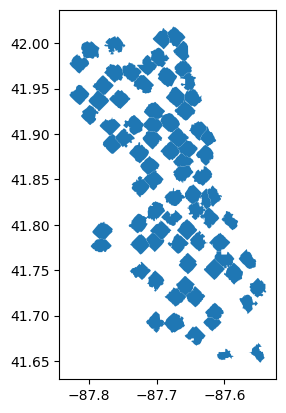

In [286]:
branchCombined.plot()

In [287]:
branchCombined.tail(3)

78    POLYGON ((-87.60436 41.75516, -87.59995 41.752...
79    POLYGON ((-87.64953 41.72626, -87.64953 41.726...
80    POLYGON ((-87.69422 41.73345, -87.69922 41.728...
dtype: geometry

In [307]:
#reading in library branch and population demographics, both with geometry data
#branchInfo = pd.read_csv('../library neighborhoods/avgTravelTime/completedWalkingNeighborhoodRadiiDF.csv')
censusTracts = pd.read_csv('../data/clean/population_demographics.csv')
censusDemographics = pd.read_csv('../data/dani data/census_demos.csv')
branchInfo = gpd.read_file('../../can-summer-2023/data/clean/branches.csv')

noBranch = pd.read_csv('../library neighborhoods/noLibNearby.csv')

In [308]:
noBranch = gpd.GeoDataFrame(
    noBranch.loc[:, [c for c in noBranch.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(noBranch["geometry"]),
    crs="epsg:4326",
    )

In [258]:
censusDemographics.sum()

geoid                                                                                           14800355223482
qualifying name                                              Census Tract 8233.03, Cook County, IllinoisCen...
geometry                                                     POLYGON ((-87.720963 41.683952, -87.720304 41....
total population                                                                                       3100713
Percent: under 5 years                                                                               52.055701
                                                                                   ...                        
Percent: American Indian and Alaska Native Alone                                                      3.951955
Percent: Asian Alone                                                                                 52.253128
Percent: Native Hawaiian and Other Pacific Islander Alone                                             0.364553
P

In [259]:
branchInfo = branchInfo.drop(60, axis=0)

In [260]:
branchInfo = branchInfo.reset_index()

In [261]:
branchInfo = branchInfo.drop(columns = ['index'])

In [262]:
branchInfo['geometry'] = branchCombined

In [263]:
branchInfo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [264]:
#removing unecessary columns from branchInfo
#branchInfo = branchInfo.drop(columns = ['Unnamed: 0'])
#removing unecessary columns from censusTracts
censusTracts = censusTracts[['geoid','geometry','qualifying name']]

In [265]:
#converting censusTracts to a geodataframe (we could not load it as one since it already had a geometry column so we are simply
#converting the geometry column to a proper gpd geometry column).
censusTracts = gpd.GeoDataFrame(
    censusTracts.loc[:, [c for c in censusTracts.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(censusTracts["geometry"]),
    crs="epsg:4326",
    )

In [266]:
branchInfo[['LATITUDE', 'LONGITUDE']] = [ast.literal_eval(x)[:2] for x in branchInfo['LOCATION']]
branchInfo.loc[:, 'LATITUDE'] = pd.to_numeric(branchInfo.loc[:, 'LATITUDE'])
branchInfo.loc[:, 'LONGITUDE'] = pd.to_numeric(branchInfo.loc[:, 'LONGITUDE'])

0     Polygon
1     Polygon
2     Polygon
3     Polygon
4     Polygon
       ...   
77    Polygon
78    Polygon
79    Polygon
80    Polygon
81       None
Length: 82, dtype: object

In [290]:
censusPops = censusDemographics[['geoid', 'total population']].copy(deep=True)
censusPops

,geoid,total population
0,17031823303,4059
1,17031823304,6316
2,17031740400,4738
3,17031740300,5017
4,17031822802,3750
...,...,...
864,17031320400,3058
865,17031320101,7952
866,17031081403,8984
867,17031081402,5613


In [268]:
censusPops.sum()

geoid               14800355223482
total population           3100713
dtype: int64

In [291]:
noBranch

,Unnamed: 0,Area,geometry
0,0,No Libs Neighborhood,"MULTIPOLYGON (((-87.79931 41.79873, -87.79924 ..."


In [292]:
noBranch = noBranch.drop(columns = "Unnamed: 0")

In [311]:
noBranch

,Unnamed: 0,Area,geometry
0,0,No Libs Neighborhood,"MULTIPOLYGON (((-87.79931 41.79873, -87.79924 ..."


In [312]:
#helper method to ensure that two polygons overlap before getting the intersection. Gets the intersection then calculates
#the percent of overlapping area for a census tract and saves it to a dictionary with the census tract geo-id as the key and
#the percent as the value.
def check(polygon1, df, geoname, dictionary,key):
   
    for i in range(len(df)):
        if polygon1.intersects(df.loc[i,geoname]): 
            overlapPolygon = (polygon1.intersection(df.loc[i,geoname]))
            poly_area, poly_perimeter = geod.geometry_area_perimeter(overlapPolygon)
            overlapArea = poly_area*-1
            propOverlap = overlapArea / df.loc[i,'Area']
            #print(propOverlap)
            dictionary[df.loc[i, key]] = propOverlap
    return dictionary
   

In [313]:
#sets the crs of gpd types
def geoSetup(gdf):
    
    gdf = gdf.set_crs('EPSG:4326')
    

In [320]:
#cdf = gdf of geometry area which you want to get the coverage score
#idf = gdf of points for which you want to get an isochrone and dictionary of percent of overlap in cdf areas
#scoreString = a string that is the name of the coverage score column you choose
#dictString = a string that is the name of the dictionary column you choose
#cgs = a string that is the name of the geometry column in the cdf
#igs = a string that is the name of the geometry column in the idf
#lat = a string that is the name of the latitude column in the idf
#lon = a string that is the name of the longitude column in the idf
#key = a string that is the name of the column in the cdf that you want to represent the key of the dictionary

def appendADS(cdf,idf,scoreString,dictString,cgs,igs,key):
    
    #api = MapboxAPI()
    cdf[scoreString] = 0.0
    idf[dictString] = ''
    censusAreas = []
    global geod 
    geod = Geod(ellps='WGS84')
   
    #geoSetup(cdf)
    #geoSetup(idf)
   
    for index, row in cdf.iterrows():
        poly_area, poly_perimeter = geod.geometry_area_perimeter(row[cgs])
        poly_area = poly_area*-1
        censusAreas.append(poly_area)
    
    cdf['Area'] = censusAreas



    for i in range(len(idf)):
        dictionary = {}
        dictionary = check(idf.loc[i,igs],cdf,cgs, dictionary,key)
        branchInfo.loc[i,dictString]= [dictionary]
    
        for i in range(len(cdf)):
   
            if dictionary.get(cdf.loc[i, key]) != None:
                score = cdf.loc[i, scoreString]
                cdf.loc[i, scoreString] = score + dictionary.get(cdf.loc[i, key])
  
   

In [277]:
def appendADS2(cdf,idf,scoreString,dictString,cgs,igs,lat,lon,key,travelTime):
    
    api = MapboxAPI()
    cdf[scoreString] = 0.0
    idf[dictString] = ''
    censusAreas = []
    global geod 
    geod = Geod(ellps='WGS84')
   
    geoSetup(cdf)
    geoSetup(idf)
   
    for index, row in cdf.iterrows():
        poly_area, poly_perimeter = geod.geometry_area_perimeter(row[cgs])
        poly_area = poly_area*-1
        censusAreas.append(poly_area)
    
    cdf['Area'] = censusAreas



    for i in range(len(idf)):
        dictionary = {}
        api_response =  api.get_data((idf.loc[i,lat],idf.loc[i,lon]), travelTime)
        idf.loc[i,igs] = shape(api_response)
        dictionary = check(idf.loc[i,igs],cdf,cgs, dictionary,key)
        branchInfo.loc[i,dictString]= [dictionary]
    
        for i in range(len(cdf)):
   
            if dictionary.get(cdf.loc[i, key]) != None:
                score = cdf.loc[i, scoreString]
                cdf.loc[i, scoreString] = score + dictionary.get(cdf.loc[i, key])
  

In [321]:
appendADS(censusTracts,noBranch, 'score', 'list of dict','geometry','geometry','geoid')

GeodError: Invalid geometry provided.

In [318]:
appendADS(censusTracts,branchInfo, 'score', 'list of dict','geometry','geometry','geoid')

AttributeError: 'DataFrame' object has no attribute 'set_crs'

In [280]:
noBranch.head(3)

,Unnamed: 0,Area,geometry,list of dict
0,0,No Libs Neighborhood,"MULTIPOLYGON (((-87.79931 41.79873, -87.79924 ...",


## Average Travel Time Function

In [90]:

#Internet
def min5Radius(DemographicsVariables, branchWithCensus):
    pop_in_branch = (branchWithCensus['Percent Overlap']  * branchWithCensus['total population']).sum()
    #Branch_pop_withInternet = (branchWithCensus['Percent Overlap'] * branchWithCensus[DemographicsVariables] * branchWithCensus['Total']).sum() 
    #result = Branch_pop_withInternet/pop_in_branch
    return pop_in_branch   

#Income


In [91]:
def branch_demographics(branchWithCensus, nameOfBranch):
    branch_snapshot_df = pd.DataFrame({'Branch': [nameOfBranch]})
    list1 = ['5 Min']
    for i in list1:
        branch_snapshot_df[i] = min5Radius(i, branchWithCensus)
    
    return branch_snapshot_df

In [203]:
def incrementPopulations(branchDataset):
    popPerLib = pd.DataFrame(columns=['Branch', 'Given Min Pop'])

    for i in range(len(branchDataset)):
        
        #Locating only Altgeld's column 'list of dict'
        libraryDictList = branchDataset.loc[i,'list of dict']
        branchName = branchDataset.loc[i,'BRANCH']
        
        #Removed set of brackets, just a dictionary now
        finalDictionary = libraryDictList[0]

        #Seperating into two columns
        dictToList = pd.DataFrame(finalDictionary.items(), columns= ['geoid','Percent Overlap'])
        libraryAndCensus = censusPops.merge(dictToList, on='geoid')

        libraryAndCensus['counts'] = 0
        for j in range(len(libraryAndCensus)):
            libraryAndCensus.loc[j,'counts'] = libraryAndCensus.loc[j,'total population'] * libraryAndCensus.loc[j,'Percent Overlap']
        
        libPop = pd.DataFrame({'BRANCH': [branchName],'Given Min Pop': libraryAndCensus['counts'].sum()})
        popPerLib = pd.concat([popPerLib, libPop])
        
    popPerLib = popPerLib.drop(columns = ['Branch'])
    popPerLib = popPerLib.reset_index()
    popPerLib = popPerLib.drop(columns = ['index'])
    
    return popPerLib

In [204]:
allPop = incrementPopulations(branchInfo)

In [205]:
allPop

,Given Min Pop,BRANCH
0,24149.688069,Albany Park
1,1436.218275,Altgeld
2,15267.408772,Archer Heights
3,23525.444391,Austin
4,18859.445087,Austin-Irving
...,...,...
76,9725.348146,West Pullman
77,28717.824564,West Town
78,18187.400698,"Whitney M. Young, Jr."
79,11699.759156,Woodson Regional Library


In [206]:
allPop.loc['total'] = allPop.sum()

In [207]:
allPop.tail(3)

,Given Min Pop,BRANCH
79,1.169976e+04,Woodson Regional Library
80,1.014946e+04,Wrightwood-Ashburn
total,1.561170e+06,Albany ParkAltgeldArcher HeightsAustinAustin-I...


In [208]:
censusPops.loc['total'] = censusPops.sum()

In [225]:
censusPops.tail(3)

,geoid,total population
867,17031081402,5613
868,17031990000,0
total,14800355223482,3100713


In [230]:
censusTotal = censusPops.loc['total', 'total population']

In [231]:
censusTotal

3100713

In [232]:
libTotal = allPop.loc['total', 'Given Min Pop']

In [234]:
libTotal

1561170.0230620883

In [235]:
libTotal/censusTotal

0.5034874311366735

In [221]:
percentNotCovered = 1-(allPop.loc['total', 'Given Min Pop']/censusPops.loc['total', 'total population'])

In [222]:
percentNotCovered

0.4965125688633265

In [152]:

allRadiiPops = pd.DataFrame(columns=['Branch', 'Prop 5 Min', 'Prop 5 to 7 Min', 'Prop 7 to 9 Min', 'Prop 9 to 11 Min', 
                                     'Prop 11 to 13 Min', 'Prop 13 to 15 Min', 'Prop 15 to 17 Min', 'Prop 17 to 19 Min',
                                     'Prop 19 to 21 Min', 'Prop 21 to 23 Min', 'Prop 23 to 25 Min', 'Prop 25 to 27 Min', 
                                     'Prop 27 to 29 Min', 'Total Pop Around Library'])

In [153]:
allRadiiPops['Branch'] = c5MinPopulation['BRANCH']
allRadiiPops['Prop 5 Min'] = c5MinPopulation['Given Min Pop']

In [154]:
allRadiiPops['Prop 5 to 7 Min'] = c7Min5Population['Given Min Pop']

In [173]:
allRadiiPops['Prop 7 to 9 Min'] = c9Min7Population['Given Min Pop']

In [192]:
allRadiiPops['Prop 9 to 11 Min'] = c11Min9Population['Given Min Pop']

In [221]:
allRadiiPops['Prop 11 to 13 Min'] = c13Min11Population['Given Min Pop']

In [219]:
allRadiiPops['Prop 13 to 15 Min'] = c15Min13Population['Given Min Pop']

In [233]:
allRadiiPops['Prop 15 to 17 Min'] = c17Min15Population['Given Min Pop']

In [245]:
allRadiiPops['Prop 17 to 19 Min'] = c19Min17Population['Given Min Pop']

In [257]:
allRadiiPops['Prop 19 to 21 Min'] = c21Min19Population['Given Min Pop']

In [270]:
allRadiiPops['Prop 21 to 23 Min'] = c23Min21Population['Given Min Pop']

In [284]:
allRadiiPops['Prop 23 to 25 Min'] = c25Min23Population['Given Min Pop']

In [294]:
allRadiiPops['Prop 25 to 27 Min'] = c27Min25Population['Given Min Pop']

In [305]:
allRadiiPops['Prop 27 to 29 Min'] = c29Min27Population['Given Min Pop']

In [306]:
allRadiiPops

,Branch,Prop 5 Min,Prop 5 to 7 Min,Prop 7 to 9 Min,Prop 9 to 11 Min,Prop 11 to 13 Min,Prop 13 to 15 Min,Prop 15 to 17 Min,Prop 17 to 19 Min,Prop 19 to 21 Min,Prop 21 to 23 Min,Prop 23 to 25 Min,Prop 25 to 27 Min,Prop 27 to 29 Min,Total Pop Around Library
0,Albany Park,1650.373795,2504.015534,3759.077873,4698.630422,5411.687973,6146.405696,4715.321023,3061.095964,1578.817888,1609.712362,474.405058,385.510704,397.883167,NaN
1,Altgeld,185.701079,206.915376,219.783643,266.897919,267.495928,289.466372,313.614442,294.890243,205.099895,305.494769,435.856229,599.257989,717.042880,NaN
2,Archer Heights,2134.879819,1807.057246,2531.024882,2663.814973,2665.948623,3464.682992,3535.319535,2744.255880,2723.691859,2145.430374,1994.249248,1563.718587,1373.829855,NaN
3,Austin,2705.760641,2592.578426,3455.462267,4221.985299,4170.229860,6379.431800,5454.339392,2611.470628,1963.975387,2617.201097,3529.597631,1475.487779,1333.158262,NaN
4,Austin-Irving,2671.920627,2243.840259,3004.610916,3266.419110,3902.363193,3770.290448,4297.734402,4096.657791,3957.445406,790.250114,590.684435,101.028449,13.556794,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,West Pullman,1134.170934,1028.341751,1252.073408,1795.736649,2095.345754,2422.659075,3010.988886,3055.968459,3672.915011,4508.928159,7475.184820,6551.598857,1569.061487,NaN
77,West Town,4097.013949,3470.411802,4405.491142,4963.811093,5775.639108,6005.457600,3318.874957,2595.980638,1773.009292,614.190454,229.779186,19.688261,0.000000,NaN
78,"Whitney M. Young, Jr.",2714.014260,2254.537196,2887.399837,3019.421007,3451.593659,3860.434750,3324.519047,2621.282788,2059.422443,2085.563894,2049.852217,1684.204008,1858.755383,NaN
79,Woodson Regional Library,1416.628851,1311.131671,1690.092034,2039.736267,2373.855673,2868.314663,2542.742574,2447.850978,2375.690563,2179.777098,2441.912907,2358.939037,1699.565607,NaN


In [324]:
allRadiiPops = allRadiiPops.fillna(0)

In [328]:
allRadiiPops = allRadiiPops.set_index('Branch')

In [330]:
allRadiiPops['Total Pop Around Library'] = allRadiiPops.sum(axis=1)

In [331]:
allRadiiPops

,Prop 5 Min,Prop 5 to 7 Min,Prop 7 to 9 Min,Prop 9 to 11 Min,Prop 11 to 13 Min,Prop 13 to 15 Min,Prop 15 to 17 Min,Prop 17 to 19 Min,Prop 19 to 21 Min,Prop 21 to 23 Min,Prop 23 to 25 Min,Prop 25 to 27 Min,Prop 27 to 29 Min,Total Pop Around Library
Branch,,,,,,,,,,,,,,
Albany Park,1650.373795,2504.015534,3759.077873,4698.630422,5411.687973,6146.405696,4715.321023,3061.095964,1578.817888,1609.712362,474.405058,385.510704,397.883167,36392.937460
Altgeld,185.701079,206.915376,219.783643,266.897919,267.495928,289.466372,313.614442,294.890243,205.099895,305.494769,435.856229,599.257989,717.042880,4307.516765
Archer Heights,2134.879819,1807.057246,2531.024882,2663.814973,2665.948623,3464.682992,3535.319535,2744.255880,2723.691859,2145.430374,1994.249248,1563.718587,1373.829855,31347.903873
Austin,2705.760641,2592.578426,3455.462267,4221.985299,4170.229860,6379.431800,5454.339392,2611.470628,1963.975387,2617.201097,3529.597631,1475.487779,1333.158262,42510.678470
Austin-Irving,2671.920627,2243.840259,3004.610916,3266.419110,3902.363193,3770.290448,4297.734402,4096.657791,3957.445406,790.250114,590.684435,101.028449,13.556794,32706.801945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Pullman,1134.170934,1028.341751,1252.073408,1795.736649,2095.345754,2422.659075,3010.988886,3055.968459,3672.915011,4508.928159,7475.184820,6551.598857,1569.061487,39572.973248
West Town,4097.013949,3470.411802,4405.491142,4963.811093,5775.639108,6005.457600,3318.874957,2595.980638,1773.009292,614.190454,229.779186,19.688261,0.000000,37269.347480
"Whitney M. Young, Jr.",2714.014260,2254.537196,2887.399837,3019.421007,3451.593659,3860.434750,3324.519047,2621.282788,2059.422443,2085.563894,2049.852217,1684.204008,1858.755383,33871.000489


In [332]:
allRadiiPops.reset_index(inplace = True)

In [333]:
allRadiiPops

,Branch,Prop 5 Min,Prop 5 to 7 Min,Prop 7 to 9 Min,Prop 9 to 11 Min,Prop 11 to 13 Min,Prop 13 to 15 Min,Prop 15 to 17 Min,Prop 17 to 19 Min,Prop 19 to 21 Min,Prop 21 to 23 Min,Prop 23 to 25 Min,Prop 25 to 27 Min,Prop 27 to 29 Min,Total Pop Around Library
0,Albany Park,1650.373795,2504.015534,3759.077873,4698.630422,5411.687973,6146.405696,4715.321023,3061.095964,1578.817888,1609.712362,474.405058,385.510704,397.883167,36392.937460
1,Altgeld,185.701079,206.915376,219.783643,266.897919,267.495928,289.466372,313.614442,294.890243,205.099895,305.494769,435.856229,599.257989,717.042880,4307.516765
2,Archer Heights,2134.879819,1807.057246,2531.024882,2663.814973,2665.948623,3464.682992,3535.319535,2744.255880,2723.691859,2145.430374,1994.249248,1563.718587,1373.829855,31347.903873
3,Austin,2705.760641,2592.578426,3455.462267,4221.985299,4170.229860,6379.431800,5454.339392,2611.470628,1963.975387,2617.201097,3529.597631,1475.487779,1333.158262,42510.678470
4,Austin-Irving,2671.920627,2243.840259,3004.610916,3266.419110,3902.363193,3770.290448,4297.734402,4096.657791,3957.445406,790.250114,590.684435,101.028449,13.556794,32706.801945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,West Pullman,1134.170934,1028.341751,1252.073408,1795.736649,2095.345754,2422.659075,3010.988886,3055.968459,3672.915011,4508.928159,7475.184820,6551.598857,1569.061487,39572.973248
77,West Town,4097.013949,3470.411802,4405.491142,4963.811093,5775.639108,6005.457600,3318.874957,2595.980638,1773.009292,614.190454,229.779186,19.688261,0.000000,37269.347480
78,"Whitney M. Young, Jr.",2714.014260,2254.537196,2887.399837,3019.421007,3451.593659,3860.434750,3324.519047,2621.282788,2059.422443,2085.563894,2049.852217,1684.204008,1858.755383,33871.000489
79,Woodson Regional Library,1416.628851,1311.131671,1690.092034,2039.736267,2373.855673,2868.314663,2542.742574,2447.850978,2375.690563,2179.777098,2441.912907,2358.939037,1699.565607,27746.237924


In [334]:
allRadiiPops['Prop 5 Min'] = allRadiiPops['Prop 5 Min']/allRadiiPops['Total Pop Around Library']
allRadiiPops['Prop 5 to 7 Min'] = allRadiiPops['Prop 5 to 7 Min']/allRadiiPops['Total Pop Around Library']
allRadiiPops['Prop 7 to 9 Min'] = allRadiiPops['Prop 7 to 9 Min']/allRadiiPops['Total Pop Around Library']
allRadiiPops['Prop 9 to 11 Min'] = allRadiiPops['Prop 9 to 11 Min']/allRadiiPops['Total Pop Around Library']
allRadiiPops['Prop 11 to 13 Min'] = allRadiiPops['Prop 11 to 13 Min']/allRadiiPops['Total Pop Around Library']
allRadiiPops['Prop 13 to 15 Min'] = allRadiiPops['Prop 13 to 15 Min']/allRadiiPops['Total Pop Around Library']
allRadiiPops['Prop 15 to 17 Min'] = allRadiiPops['Prop 15 to 17 Min']/allRadiiPops['Total Pop Around Library']
allRadiiPops['Prop 17 to 19 Min'] = allRadiiPops['Prop 17 to 19 Min']/allRadiiPops['Total Pop Around Library']
allRadiiPops['Prop 19 to 21 Min'] = allRadiiPops['Prop 19 to 21 Min']/allRadiiPops['Total Pop Around Library']
allRadiiPops['Prop 21 to 23 Min'] = allRadiiPops['Prop 21 to 23 Min']/allRadiiPops['Total Pop Around Library']
allRadiiPops['Prop 23 to 25 Min'] = allRadiiPops['Prop 23 to 25 Min']/allRadiiPops['Total Pop Around Library']
allRadiiPops['Prop 25 to 27 Min'] = allRadiiPops['Prop 25 to 27 Min']/allRadiiPops['Total Pop Around Library']
allRadiiPops['Prop 27 to 29 Min'] = allRadiiPops['Prop 27 to 29 Min']/allRadiiPops['Total Pop Around Library']

In [335]:
allRadiiPops

,Branch,Prop 5 Min,Prop 5 to 7 Min,Prop 7 to 9 Min,Prop 9 to 11 Min,Prop 11 to 13 Min,Prop 13 to 15 Min,Prop 15 to 17 Min,Prop 17 to 19 Min,Prop 19 to 21 Min,Prop 21 to 23 Min,Prop 23 to 25 Min,Prop 25 to 27 Min,Prop 27 to 29 Min,Total Pop Around Library
0,Albany Park,0.045349,0.068805,0.103291,0.129108,0.148702,0.168890,0.129567,0.084112,0.043383,0.044231,0.013036,0.010593,0.010933,36392.937460
1,Altgeld,0.043111,0.048036,0.051023,0.061961,0.062100,0.067200,0.072806,0.068459,0.047614,0.070921,0.101185,0.139119,0.166463,4307.516765
2,Archer Heights,0.068103,0.057645,0.080740,0.084976,0.085044,0.110524,0.112777,0.087542,0.086886,0.068439,0.063617,0.049883,0.043825,31347.903873
3,Austin,0.063649,0.060987,0.081285,0.099316,0.098098,0.150067,0.128305,0.061431,0.046200,0.061566,0.083028,0.034709,0.031361,42510.678470
4,Austin-Irving,0.081693,0.068605,0.091865,0.099870,0.119314,0.115275,0.131402,0.125254,0.120998,0.024162,0.018060,0.003089,0.000414,32706.801945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,West Pullman,0.028660,0.025986,0.031640,0.045378,0.052949,0.061220,0.076087,0.077224,0.092814,0.113940,0.188896,0.165557,0.039650,39572.973248
77,West Town,0.109930,0.093117,0.118207,0.133187,0.154970,0.161137,0.089051,0.069655,0.047573,0.016480,0.006165,0.000528,0.000000,37269.347480
78,"Whitney M. Young, Jr.",0.080128,0.066562,0.085247,0.089145,0.101904,0.113975,0.098152,0.077390,0.060802,0.061574,0.060519,0.049724,0.054877,33871.000489
79,Woodson Regional Library,0.051057,0.047254,0.060912,0.073514,0.085556,0.103377,0.091643,0.088223,0.085622,0.078561,0.088009,0.085018,0.061254,27746.237924


In [336]:
allRadiiPops['Weighted Average Travel Time'] = 0

In [337]:
allRadiiPops

,Branch,Prop 5 Min,Prop 5 to 7 Min,Prop 7 to 9 Min,Prop 9 to 11 Min,Prop 11 to 13 Min,Prop 13 to 15 Min,Prop 15 to 17 Min,Prop 17 to 19 Min,Prop 19 to 21 Min,Prop 21 to 23 Min,Prop 23 to 25 Min,Prop 25 to 27 Min,Prop 27 to 29 Min,Total Pop Around Library,Weighted Average Travel Time
0,Albany Park,0.045349,0.068805,0.103291,0.129108,0.148702,0.168890,0.129567,0.084112,0.043383,0.044231,0.013036,0.010593,0.010933,36392.937460,0
1,Altgeld,0.043111,0.048036,0.051023,0.061961,0.062100,0.067200,0.072806,0.068459,0.047614,0.070921,0.101185,0.139119,0.166463,4307.516765,0
2,Archer Heights,0.068103,0.057645,0.080740,0.084976,0.085044,0.110524,0.112777,0.087542,0.086886,0.068439,0.063617,0.049883,0.043825,31347.903873,0
3,Austin,0.063649,0.060987,0.081285,0.099316,0.098098,0.150067,0.128305,0.061431,0.046200,0.061566,0.083028,0.034709,0.031361,42510.678470,0
4,Austin-Irving,0.081693,0.068605,0.091865,0.099870,0.119314,0.115275,0.131402,0.125254,0.120998,0.024162,0.018060,0.003089,0.000414,32706.801945,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,West Pullman,0.028660,0.025986,0.031640,0.045378,0.052949,0.061220,0.076087,0.077224,0.092814,0.113940,0.188896,0.165557,0.039650,39572.973248,0
77,West Town,0.109930,0.093117,0.118207,0.133187,0.154970,0.161137,0.089051,0.069655,0.047573,0.016480,0.006165,0.000528,0.000000,37269.347480,0
78,"Whitney M. Young, Jr.",0.080128,0.066562,0.085247,0.089145,0.101904,0.113975,0.098152,0.077390,0.060802,0.061574,0.060519,0.049724,0.054877,33871.000489,0
79,Woodson Regional Library,0.051057,0.047254,0.060912,0.073514,0.085556,0.103377,0.091643,0.088223,0.085622,0.078561,0.088009,0.085018,0.061254,27746.237924,0


In [342]:
for i in range(len(allRadiiPops)):
    allRadiiPops.loc[i,'Weighted Average Travel Time'] = (((allRadiiPops.loc[i,'Prop 5 Min'])*5) +
                                                        ((allRadiiPops.loc[i,'Prop 5 to 7 Min'])*6) +
                                                        ((allRadiiPops.loc[i,'Prop 7 to 9 Min'])*8) +
                                                        ((allRadiiPops.loc[i,'Prop 9 to 11 Min'])*10) +
                                                        ((allRadiiPops.loc[i,'Prop 11 to 13 Min'])*12) +
                                                        ((allRadiiPops.loc[i,'Prop 13 to 15 Min'])*14) +
                                                        ((allRadiiPops.loc[i,'Prop 15 to 17 Min'])*16) +
                                                        ((allRadiiPops.loc[i,'Prop 17 to 19 Min'])*18) +
                                                        ((allRadiiPops.loc[i,'Prop 19 to 21 Min'])*20) +
                                                        ((allRadiiPops.loc[i,'Prop 21 to 23 Min'])*22) +
                                                        ((allRadiiPops.loc[i,'Prop 23 to 25 Min'])*24) +
                                                        ((allRadiiPops.loc[i,'Prop 25 to 27 Min'])*26) +
                                                         (allRadiiPops.loc[i,'Prop 27 to 29 Min'])*28)

In [343]:
allRadiiPops

,Branch,Prop 5 Min,Prop 5 to 7 Min,Prop 7 to 9 Min,Prop 9 to 11 Min,Prop 11 to 13 Min,Prop 13 to 15 Min,Prop 15 to 17 Min,Prop 17 to 19 Min,Prop 19 to 21 Min,Prop 21 to 23 Min,Prop 23 to 25 Min,Prop 25 to 27 Min,Prop 27 to 29 Min,Total Pop Around Library,Weighted Average Travel Time
0,Albany Park,0.045349,0.068805,0.103291,0.129108,0.148702,0.168890,0.129567,0.084112,0.043383,0.044231,0.013036,0.010593,0.010933,36392.937460,13.228101
1,Altgeld,0.043111,0.048036,0.051023,0.061961,0.062100,0.067200,0.072806,0.068459,0.047614,0.070921,0.101185,0.139119,0.166463,4307.516765,18.833803
2,Archer Heights,0.068103,0.057645,0.080740,0.084976,0.085044,0.110524,0.112777,0.087542,0.086886,0.068439,0.063617,0.049883,0.043825,31347.903873,15.424347
3,Austin,0.063649,0.060987,0.081285,0.099316,0.098098,0.150067,0.128305,0.061431,0.046200,0.061566,0.083028,0.034709,0.031361,42510.678470,14.815993
4,Austin-Irving,0.081693,0.068605,0.091865,0.099870,0.119314,0.115275,0.131402,0.125254,0.120998,0.024162,0.018060,0.003089,0.000414,32706.801945,13.433197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,West Pullman,0.028660,0.025986,0.031640,0.045378,0.052949,0.061220,0.076087,0.077224,0.092814,0.113940,0.188896,0.165557,0.039650,39572.973248,19.417139
77,West Town,0.109930,0.093117,0.118207,0.133187,0.154970,0.161137,0.089051,0.069655,0.047573,0.016480,0.006165,0.000528,0.000000,37269.347480,11.655752
78,"Whitney M. Young, Jr.",0.080128,0.066562,0.085247,0.089145,0.101904,0.113975,0.098152,0.077390,0.060802,0.061574,0.060519,0.049724,0.054877,33871.000489,15.007914
79,Woodson Regional Library,0.051057,0.047254,0.060912,0.073514,0.085556,0.103377,0.091643,0.088223,0.085622,0.078561,0.088009,0.085018,0.061254,27746.237924,16.768074


In [345]:
allRadiiPops.sort_values(by=['Weighted Average Travel Time'], ascending=True)

,Branch,Prop 5 Min,Prop 5 to 7 Min,Prop 7 to 9 Min,Prop 9 to 11 Min,Prop 11 to 13 Min,Prop 13 to 15 Min,Prop 15 to 17 Min,Prop 17 to 19 Min,Prop 19 to 21 Min,Prop 21 to 23 Min,Prop 23 to 25 Min,Prop 25 to 27 Min,Prop 27 to 29 Min,Total Pop Around Library,Weighted Average Travel Time
42,Little Italy,0.252758,0.139222,0.110935,0.138301,0.130976,0.079943,0.037273,0.039526,0.040953,0.018390,0.009908,0.001679,0.000137,15156.308441,9.877276
15,Chicago Bee,0.169500,0.104911,0.126277,0.125288,0.148488,0.143009,0.099208,0.077307,0.006012,0.000000,0.000000,0.000000,0.000000,10766.119968,10.623134
25,Edgewater,0.139581,0.133822,0.129011,0.138184,0.128332,0.125329,0.074948,0.068086,0.030368,0.024074,0.005715,0.001683,0.000867,52291.433132,10.976249
12,Bucktown-Wicker Park,0.102846,0.102530,0.123263,0.155468,0.170739,0.155937,0.078795,0.052236,0.033321,0.019228,0.003748,0.001890,0.000000,40977.053735,11.331655
33,Humboldt Park,0.106053,0.095281,0.119467,0.167621,0.155359,0.132837,0.094449,0.068522,0.034796,0.020328,0.005286,0.000000,0.000000,29353.260177,11.472525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,Hegewisch,0.065135,0.045458,0.050522,0.054078,0.048017,0.040769,0.063748,0.079486,0.103850,0.120215,0.109032,0.142416,0.077273,3673.380486,18.346040
58,Roden,0.030559,0.030151,0.045615,0.055599,0.080292,0.083692,0.086627,0.081420,0.086497,0.093621,0.080261,0.084927,0.160739,38809.684004,18.666055
69,Walker,0.029018,0.025491,0.037701,0.051298,0.064383,0.082109,0.085484,0.087550,0.087915,0.137112,0.045565,0.249359,0.017016,32995.111196,18.806467
1,Altgeld,0.043111,0.048036,0.051023,0.061961,0.062100,0.067200,0.072806,0.068459,0.047614,0.070921,0.101185,0.139119,0.166463,4307.516765,18.833803


In [346]:
allRadiiPops

,Branch,Prop 5 Min,Prop 5 to 7 Min,Prop 7 to 9 Min,Prop 9 to 11 Min,Prop 11 to 13 Min,Prop 13 to 15 Min,Prop 15 to 17 Min,Prop 17 to 19 Min,Prop 19 to 21 Min,Prop 21 to 23 Min,Prop 23 to 25 Min,Prop 25 to 27 Min,Prop 27 to 29 Min,Total Pop Around Library,Weighted Average Travel Time
0,Albany Park,0.045349,0.068805,0.103291,0.129108,0.148702,0.168890,0.129567,0.084112,0.043383,0.044231,0.013036,0.010593,0.010933,36392.937460,13.228101
1,Altgeld,0.043111,0.048036,0.051023,0.061961,0.062100,0.067200,0.072806,0.068459,0.047614,0.070921,0.101185,0.139119,0.166463,4307.516765,18.833803
2,Archer Heights,0.068103,0.057645,0.080740,0.084976,0.085044,0.110524,0.112777,0.087542,0.086886,0.068439,0.063617,0.049883,0.043825,31347.903873,15.424347
3,Austin,0.063649,0.060987,0.081285,0.099316,0.098098,0.150067,0.128305,0.061431,0.046200,0.061566,0.083028,0.034709,0.031361,42510.678470,14.815993
4,Austin-Irving,0.081693,0.068605,0.091865,0.099870,0.119314,0.115275,0.131402,0.125254,0.120998,0.024162,0.018060,0.003089,0.000414,32706.801945,13.433197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,West Pullman,0.028660,0.025986,0.031640,0.045378,0.052949,0.061220,0.076087,0.077224,0.092814,0.113940,0.188896,0.165557,0.039650,39572.973248,19.417139
77,West Town,0.109930,0.093117,0.118207,0.133187,0.154970,0.161137,0.089051,0.069655,0.047573,0.016480,0.006165,0.000528,0.000000,37269.347480,11.655752
78,"Whitney M. Young, Jr.",0.080128,0.066562,0.085247,0.089145,0.101904,0.113975,0.098152,0.077390,0.060802,0.061574,0.060519,0.049724,0.054877,33871.000489,15.007914
79,Woodson Regional Library,0.051057,0.047254,0.060912,0.073514,0.085556,0.103377,0.091643,0.088223,0.085622,0.078561,0.088009,0.085018,0.061254,27746.237924,16.768074


In [351]:
averageWalkingTimeNeighborhoods = pd.DataFrame(columns=['Branch', 'Average Walking Time (Minutes)'])


In [352]:
averageWalkingTimeNeighborhoods['Branch'] = allRadiiPops['Branch']
averageWalkingTimeNeighborhoods['Average Walking Time (Minutes)'] = allRadiiPops['Weighted Average Travel Time']

In [353]:
averageWalkingTimeNeighborhoods

,Branch,Average Walking Time (Minutes)
0,Albany Park,13.228101
1,Altgeld,18.833803
2,Archer Heights,15.424347
3,Austin,14.815993
4,Austin-Irving,13.433197
...,...,...
76,West Pullman,19.417139
77,West Town,11.655752
78,"Whitney M. Young, Jr.",15.007914
79,Woodson Regional Library,16.768074


In [354]:
averageWalkingTimeNeighborhoods.to_csv('../library neighborhoods/averageWalkingTimeNeighborhoods.csv')